In [613]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as ani

In [514]:
def f1(t, S, I, R):
    N = S + I + R
    return -beta*S*I/N

In [515]:
def f2(t, S, I, R):
    N = S + I + R
    return beta*S*I/N - gamma*I

In [516]:
def f3(t, S, I, R):
    N = S + I + R
    return gamma*I

In [517]:
def params(t0, S0, I0, R0, h, f1, f2, f3):
    k1 = h*f1(t0, S0, I0, R0)
    l1 = h*f2(t0, S0, I0, R0)
    m1 = h*f3(t0, S0, I0, R0)
    
    k2 = h*f1(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    l2 = h*f2(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    m2 = h*f3(t0 + h/2, S0 + k1/2, I0 + l1/2, R0 + m1/2) 
    
    k3 = h*f1(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    l3 = h*f2(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    m3 = h*f3(t0 + h/2, S0 + k2/2, I0 + l2/2, R0 + m2/2)
    
    k4 = h*f1(t0 + h, S0 + k3, I0 + l3, R0 + m3) 
    l4 = h*f2(t0 + h, S0 + k3, I0 + l3, R0 + m3)
    m4 = h*f3(t0 + h, S0 + k3, I0 + l3, R0 + m3)
    
    ks = [k1, k2, k3, k4]
    ls = [l1, l2, l3, l4]
    ms = [m1, m2, m3, m4]
    
    return ks, ls, ms

In [518]:
def nextS(S_prev, k1, k2, k3, k4):
    S = S_prev + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return S

def nextI(I_prev, l1, l2, l3, l4):
    I = I_prev + 1/6*(l1 + 2*l2 + 2*l3 + l4)
    return I

def nextR(R_prev, m1, m2, m3, m4):
    R = R_prev + 1/6*(m1 + 2*m2 + 2*m3 + m4)
    return R

In [592]:
def SIR_model(num_iters, beta, gamma, S0, I0, R0, t0, h):
    Ss = [S0]
    Is = [I0]
    Rs = [R0]
    ts = [0]
    Ns = [S0 + I0 + R0]
    
    
    for i in range(1, num_iters):
        ks, ls, ms = params(t0, Ss[-1], Is[-1], Rs[-1], i*h, f1, f2, f3)

        S_new = (nextS(Ss[-1], ks[0], ks[1], ks[2], ks[3]))
        I_new = (nextI(Is[-1], ls[0], ls[1], ls[2], ls[3]))
        R_new = (nextR(Rs[-1], ms[0], ms[1], ms[2], ms[3]))


        if S_new < 0 or I_new < 0 or R_new < 0:
            break
        print(i, S_new, I_new, R_new, i*h)

        Ss.append(S_new)
        Is.append(I_new)
        Rs.append(R_new)
        Ns.append(S_new+I_new+R_new)
        ts.append(t0 + h*i)
        
    return Ss, Is, Rs, ts

In [608]:
Ss, Is, Rs, ts = SIR_model(1000, 0.2, 1/17, 1000, 1, 0, 0, 0.025) 

1 999.9899689476889 1.0082379927173097 0.0017930595937554394 0.025
2 999.9696585658129 1.0249178205456158 0.005423613641473383 0.05
3 999.9385620589057 1.0504555717530275 0.010982369341185119 0.07500000000000001
4 999.8958930417898 1.0854968706931534 0.018610087516963005 0.1
5 999.8405524151364 1.1309440565983933 0.02850352826518765 0.125
6 999.7710812426127 1.1879948451968736 0.040923912190402006 0.15000000000000002
7 999.6855968158468 1.258194778463754 0.05620840568940558 0.17500000000000002
8 999.5817080120768 1.3435066529190967 0.07478533500406898 0.2
9 999.4564046680067 1.4464012468386866 0.09719408515459116 0.225
10 999.3059138980294 1.5699751343249022 0.12411096764567293 0.25
11 999.125513923788 1.7181033026710788 0.1563827735409034 0.275
12 998.9092928512073 1.8956368439850926 0.19507030480764043 0.30000000000000004
13 998.6498356558019 2.1086593946688628 0.24150494952924412 0.325
14 998.3378170462142 2.3648205458011295 0.29736240798467123 0.35000000000000003
15 997.96147036940

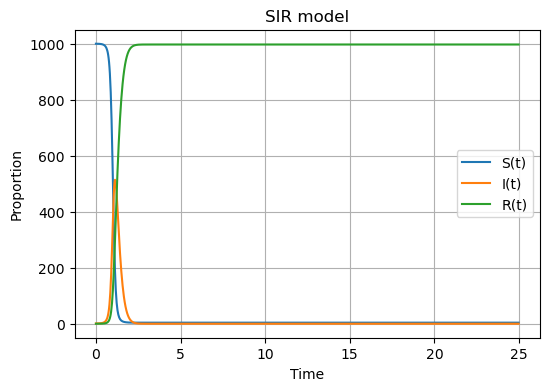

In [612]:
plt.figure(figsize = [6, 4])
plt.plot(ts, Ss, label = "S(t)")
plt.plot(ts, Is, label = "I(t)")
plt.plot(ts, Rs, label = "R(t)")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("SIR model")

plt.show()

In [614]:
ani = animation.FuncAnimation(fig, update, frames=max(len(x_projektila_sa), len(x_projektila_bez)) + 50, repeat=False, interval=de

SyntaxError: incomplete input (1146198621.py, line 1)

In [ ]:
ani = animation.FuncAnimation(fig, update, frames=max(len(x_projektila_sa), len(x_projektila_bez)) + 50, repeat=False, interval=delta_t * 10)